# Trabajo práctico integrador

**Nombre**: Rodrigo Pazos

## Primera Parte (Clase 1 y 2)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [57]:
array0 = np.matrix([[0, 0], [0, 0]])
array1 = np.matrix([[1, 0], [1, 1]])
array2 = np.matrix([[1, 2], [3, 4]])
array3 = np.matrix([[-1, 2], [3, -4]])

In [58]:
def norm_p(vector, p: int) -> float:
  if p == 0:
    return np.count_nonzero(vector)
  else:
    abs = np.absolute(vector)
    abs_and_pow = np.power(abs, p)
    sum = np.sum(abs_and_pow)
    return np.power(sum, 1/p)


def norm_inf(vector) -> float:
    return np.abs(vector).max()

In [59]:
print("Norm 0 Array 0 = ", norm_p(array0, 0))
print("Norm 0 Array 1 = ", norm_p(array1, 0))
print("Norm 0 Array 2 = ", norm_p(array2, 0))
print("Norm 0 Array 3 = ", norm_p(array3, 0))

print("Norm 1 Array 0 = ", norm_p(array0, 1))
print("Norm 1 Array 1 = ", norm_p(array1, 1))
print("Norm 1 Array 2 = ", norm_p(array2, 1))
print("Norm 1 Array 3 = ", norm_p(array3, 1))

print("Norm 2 Array 0 = ", norm_p(array0, 2))
print("Norm 2 Array 1 = ", norm_p(array1, 2))
print("Norm 2 Array 2 = ", norm_p(array2, 2))
print("Norm 2 Array 3 = ", norm_p(array3, 2))

print("Norm Inf Array 0 = ", norm_inf(array0))
print("Norm Inf Array 1 = ", norm_inf(array1))
print("Norm Inf Array 2 = ", norm_inf(array2))
print("Norm Inf Array 3 = ", norm_inf(array3))

Norm 0 Array 0 =  0
Norm 0 Array 1 =  3
Norm 0 Array 2 =  4
Norm 0 Array 3 =  4
Norm 1 Array 0 =  0.0
Norm 1 Array 1 =  3.0
Norm 1 Array 2 =  10.0
Norm 1 Array 3 =  10.0
Norm 2 Array 0 =  0.0
Norm 2 Array 1 =  1.7320508075688772
Norm 2 Array 2 =  5.477225575051661
Norm 2 Array 3 =  5.477225575051661
Norm Inf Array 0 =  0
Norm Inf Array 1 =  1
Norm Inf Array 2 =  4
Norm Inf Array 3 =  4


### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [60]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

In [61]:
negative = 0.0
positive = 1.0

tpl = lambda t, p: np.sum(np.logical_and(p == positive, t == positive))
tnl = lambda t, p: np.sum(np.logical_and(p == negative, t == negative))
fpl = lambda t, p: np.sum(np.logical_and(p == positive, t == negative))
fnl = lambda t, p: np.sum(np.logical_and(p == negative, t == positive))

def precision (t, p):
    tp = tpl(t, p)
    fp = fpl(t, p)
    return tp/ (tp + fp)

def recall (t, p):
    tp = tpl(t, p)
    fn = fnl(t, p)
    return tp/ (tp + fn)

def accuracy (t, p):
    tp = tpl(t, p)
    fp = fpl(t, p)
    tn = tnl(t, p)
    fn = fnl(t, p)
    return (tp + tn) / (tp + fp + tn + fn)


In [62]:
print(precision(truth, prediction))
print(recall(truth, prediction))
print(accuracy(truth, prediction))

0.5
0.5
0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

## Segunda Parte (Clase 3 y 4)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [64]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [65]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


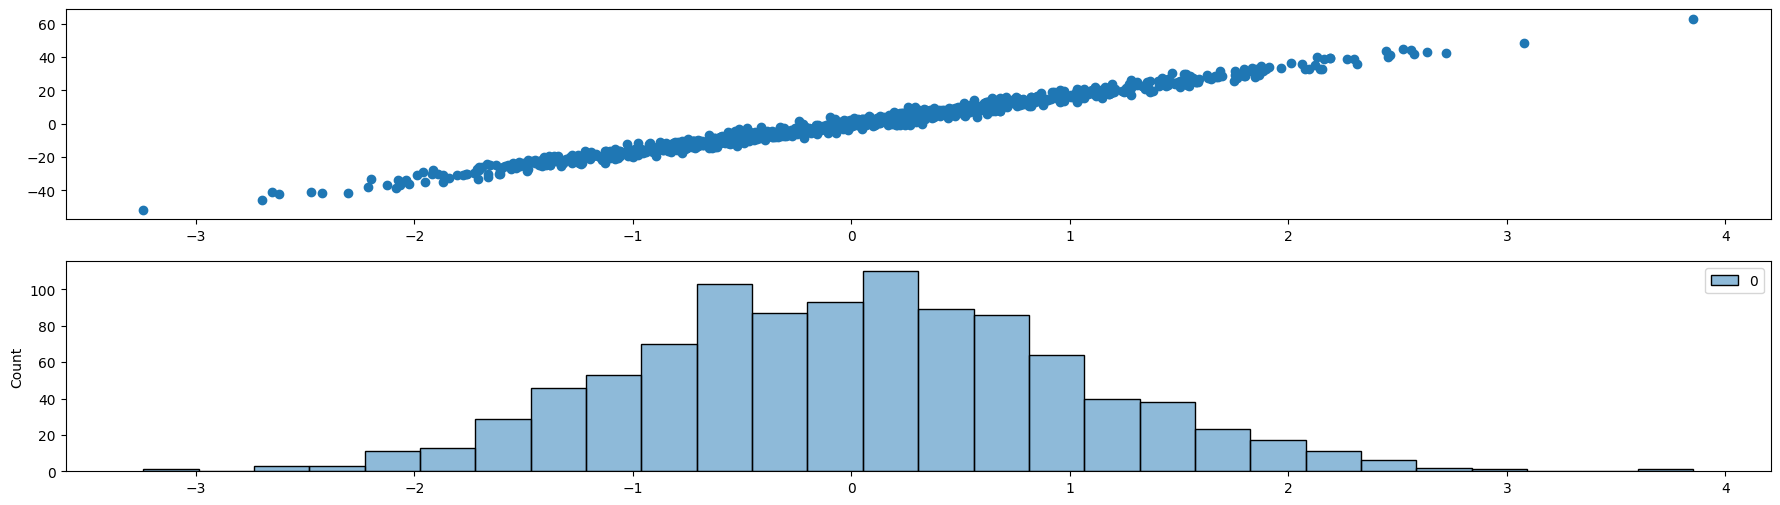

In [66]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [67]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [68]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

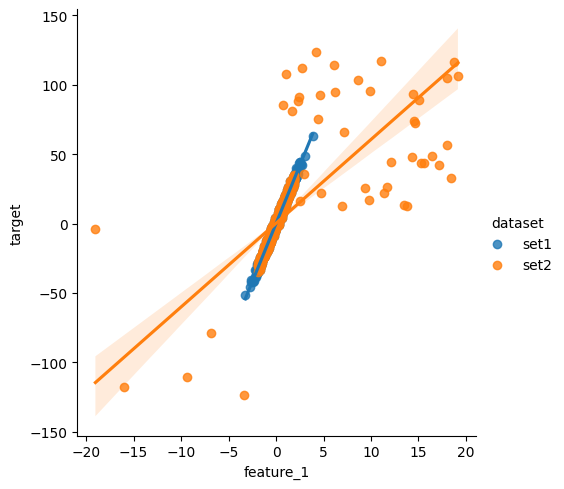

In [69]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [81]:
def split(df: pd.DataFrame, train_size: float):
    
    randomized_df = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)

    target_column = "target"

    rows = df.shape[0]
    train = df.iloc[0:int(rows*0.7)]
    test = df.iloc[int(rows*0.7):int(rows*0.9)]
    val = df.iloc[int(rows*0.9):rows]

    X_train = train.drop(target_column, axis=1)
    X_val = val.drop(target_column, axis=1)
    X_test = test.drop(target_column, axis=1)

    Y_train = train["target"]
    Y_val = val["target"]
    Y_test = test["target"]

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

X_train, X_val, X_test, Y_train, Y_val, Y_test = split(df, 2)
print(f"X_train:\n {X_train} \n X_val:\n {X_val} X_test:\n {X_test} \n")

X_train:
      feature_1
0     0.333662
1    -0.185659
2    -0.049464
3    -0.790474
4     0.755391
..         ...
695   0.380198
696   1.538037
697   0.497998
698   0.214094
699   0.250493

[700 rows x 1 columns] 
 X_val:
      feature_1
900  -1.424748
901  -0.715304
902   2.632382
903  -0.493001
904  -0.268889
..         ...
995   0.097078
996  -0.661786
997   1.529550
998  -0.937825
999  -1.237815

[100 rows x 1 columns] X_test:
      feature_1
700   1.644968
701  -0.362839
702  -0.096060
703   2.526932
704   0.471416
..         ...
895   0.249384
896   1.441273
897   0.972554
898   0.198085
899   0.122010

[200 rows x 1 columns] 



### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

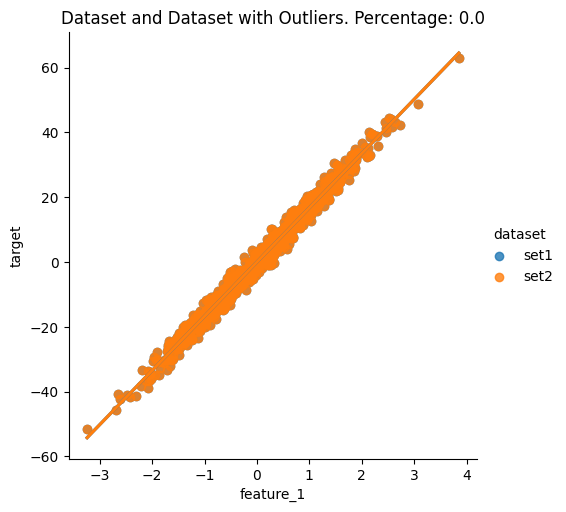

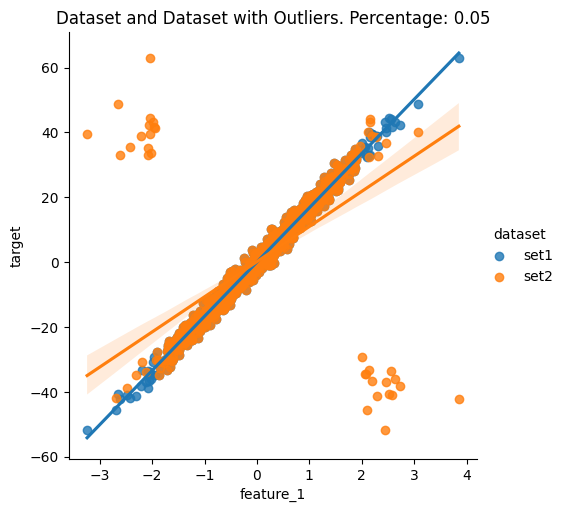

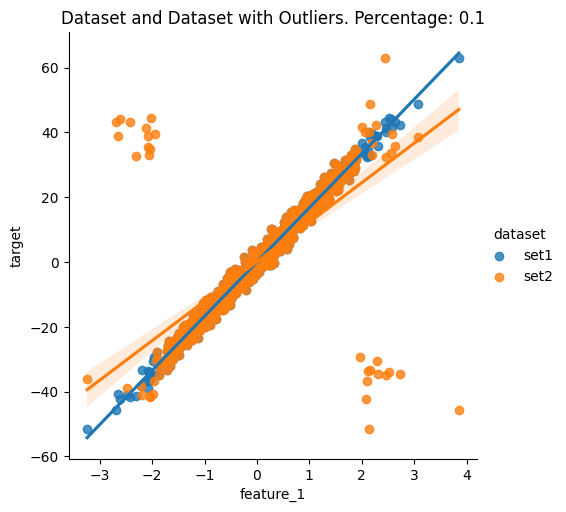

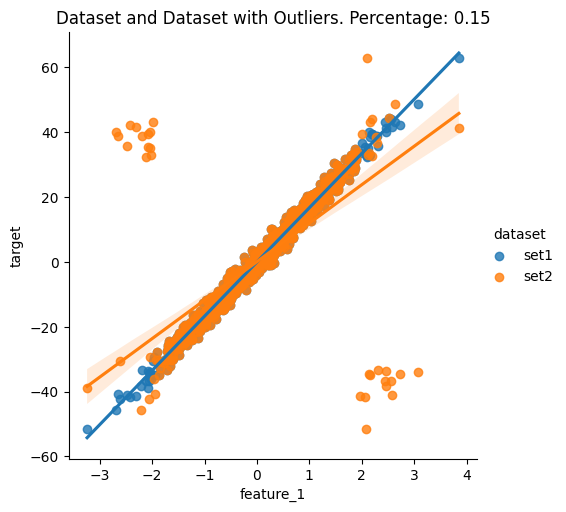

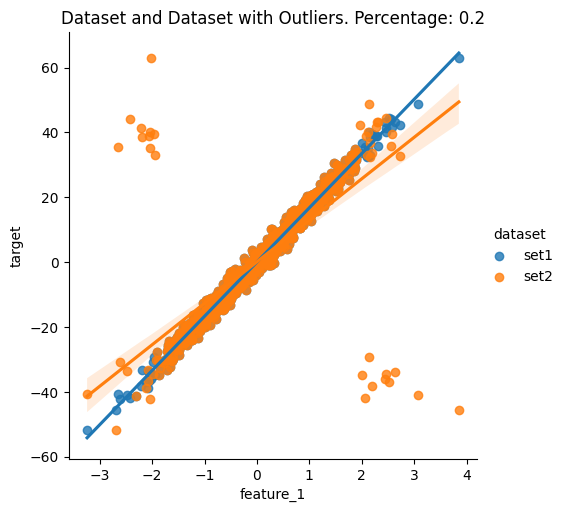

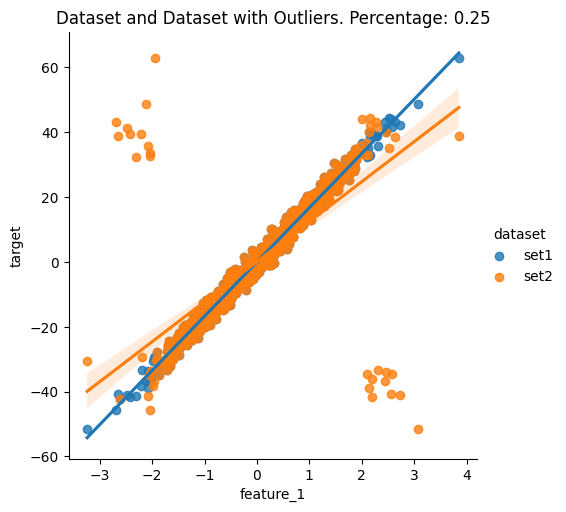

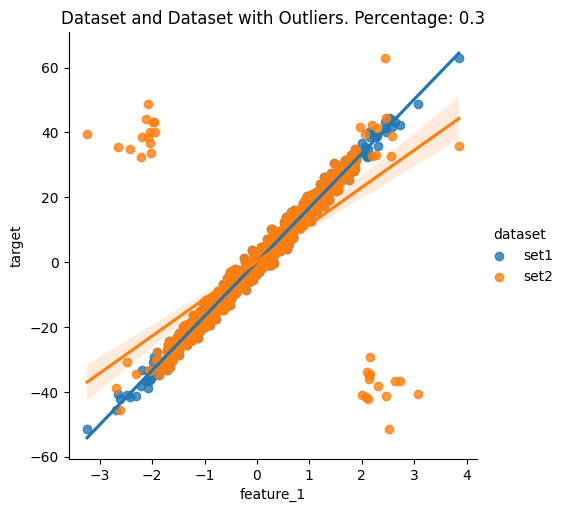

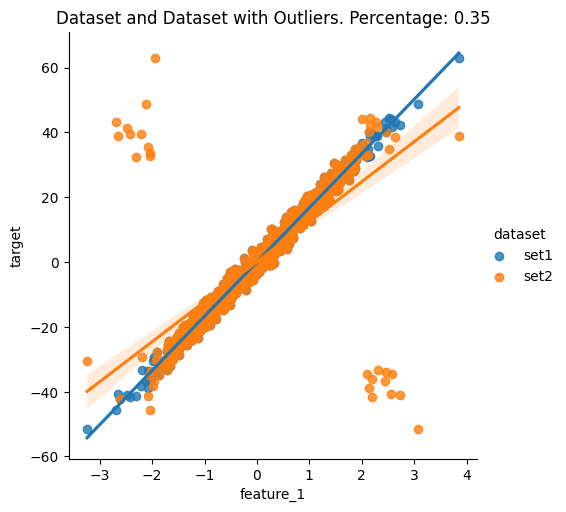

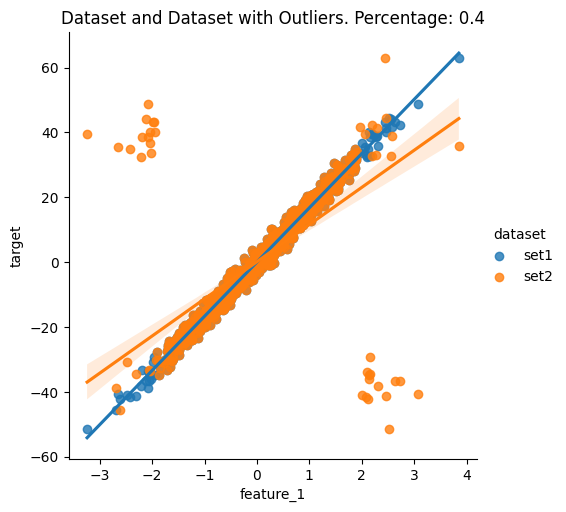

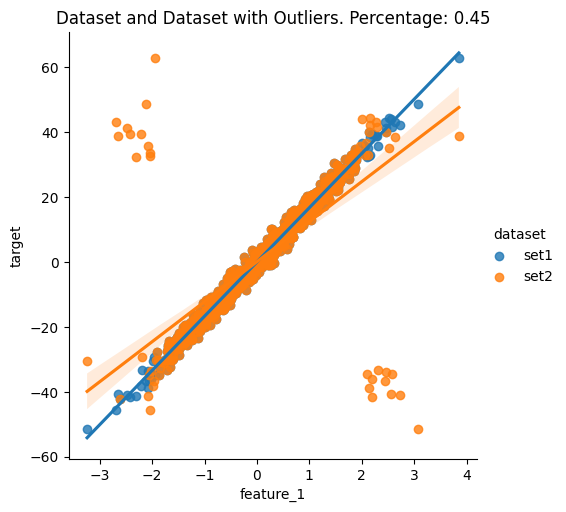

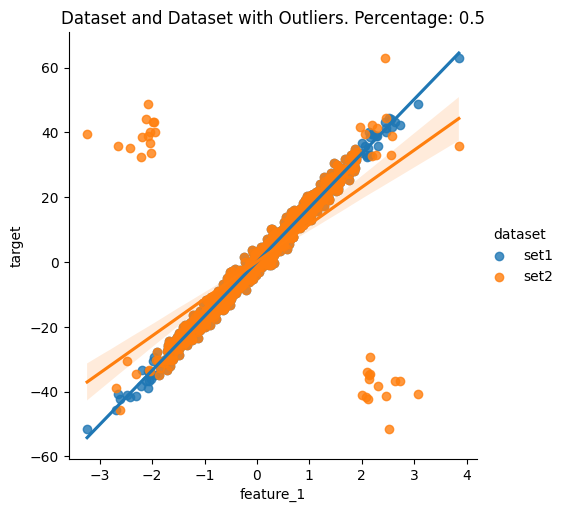

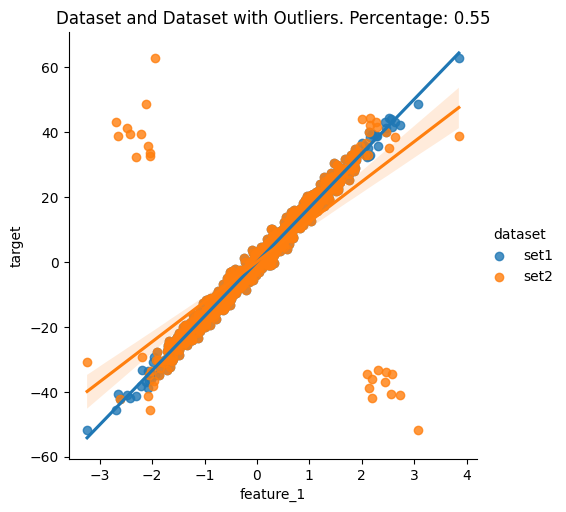

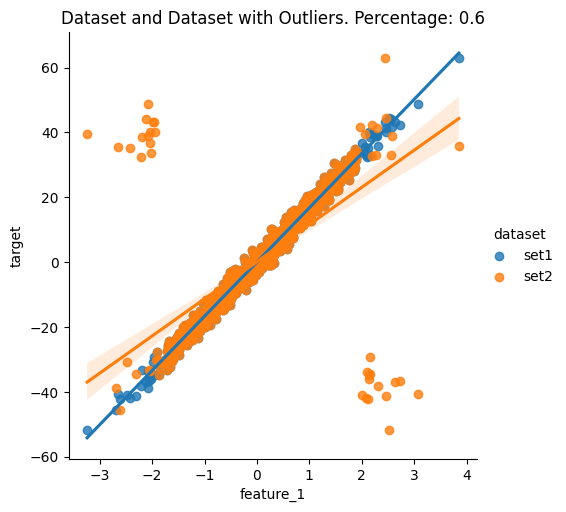

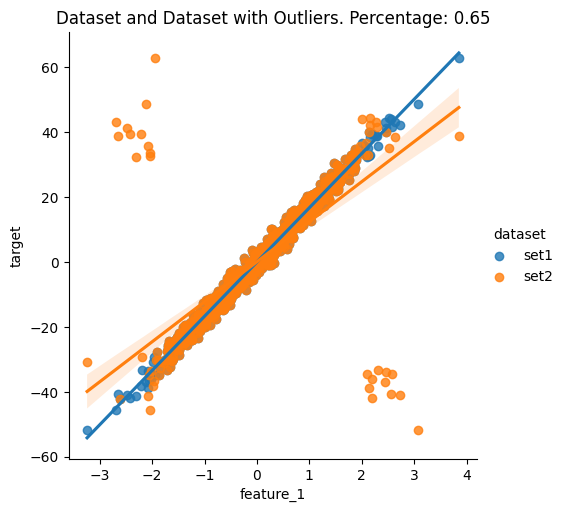

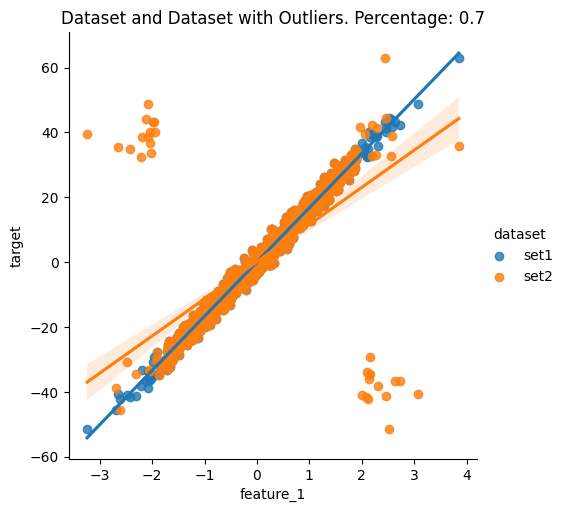

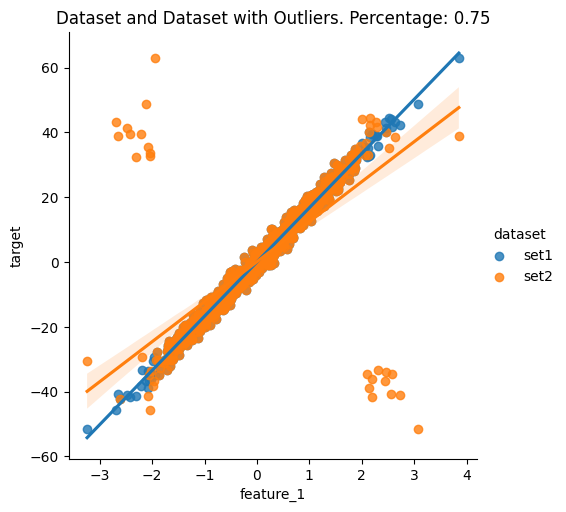

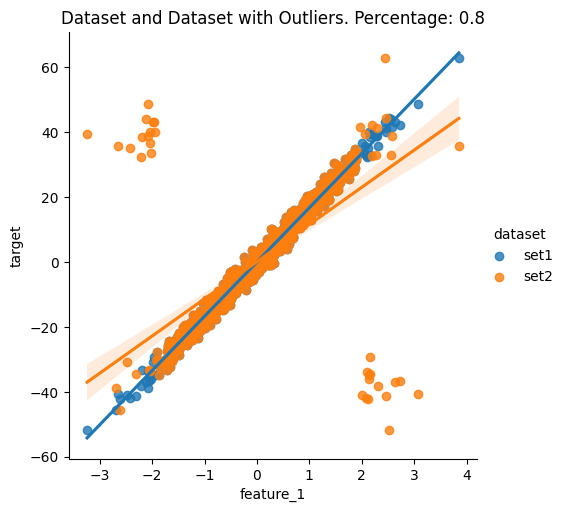

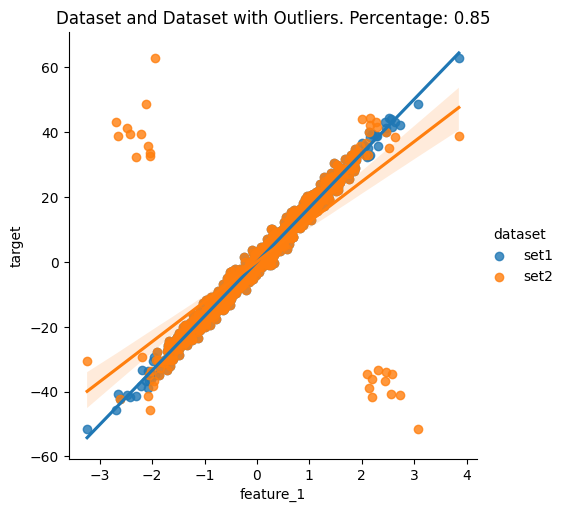

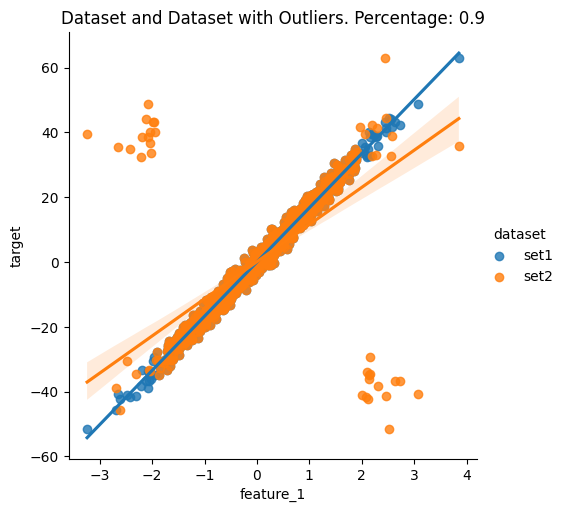

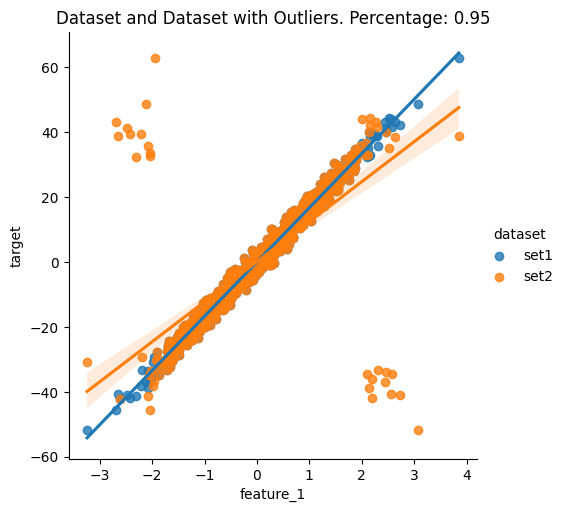

In [88]:

for percentage in range(0, 100, 5):
    df_with_outliers = generate_outliers(df,['feature_1'], percentage = percentage/100, extreme_outlier = False, two_tailed= True)
    sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                    df_with_outliers.assign(dataset = 'set2')]),
                    x = 'feature_1',
                    y = 'target',
                    hue = 'dataset').set(title=f'Dataset and Dataset with Outliers. Percentage: {percentage/100}')


## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`